# Test 30 trials for the Quadratic Assignment Problem

In [2]:
# useful additional packages 
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv('thirty_trials-ibmq_rochester-made4.csv')
data1 = pd.read_csv('thirty_trials-ibmq_rochester-made4 (2).csv')
data2 = pd.read_csv('thirty_trials-ibmq_rochester-made4 (3).csv')
#data3 = pd.read_csv('thirty_trials-ibmq_toronto-made4 (3).csv')
data1[' iteration'] = data1[' iteration'] + 19
data2[' iteration'] = data2[' iteration'] + 29
#data3[' iteration'] = data3[' iteration'] + 24
frames = [data,data1,data2]#,data3]
data = pd.concat(frames)
data

FileNotFoundError: [Errno 2] File thirty_trials-ibmq_rochester-made4.csv does not exist: 'thirty_trials-ibmq_rochester-made4.csv'

In [3]:
data = pd.read_csv('thirty_trials-ibmq_manhattan-made3.csv')
r = data[329:500][['value','   frequency']].sort_values('value')
#r.info()
r.to_csv('manhattan_distribution.csv')

Text(0, 25, '11126')

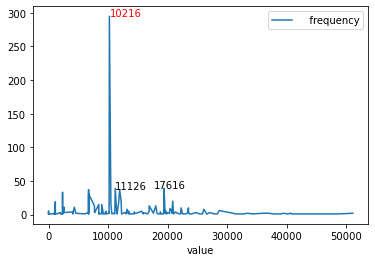

In [88]:
fig, ax = plt.subplots()
r.plot('value','   frequency',ax=ax)

ax.annotate(10216, r.loc[435], color='red')
ax.annotate(17616, r.loc[408], xytext=(0,25), textcoords='offset points', color='black')
ax.annotate(11126, r.loc[334], xytext=(0,25), textcoords='offset points', color='black')

In [5]:
r.loc[334]

value           11126
   frequency        1
Name: 334, dtype: int64

In [4]:

#[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

In [26]:
times = data[[' time',' iteration']].groupby(' iteration').mean()
np.round(times.mean(),2)
#[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
#times
times.sort_values(by = ' time')

,time
iteration,
23,1557.011745
4,1563.924896
6,1572.803834
19,1573.200797
27,1573.709802
22,1575.966547
12,1577.783041
5,1577.783141
24,1577.829009


In [28]:
times2 = times.iloc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
print('upper limit:', np.round(times2.mean()+(3*times2.std()),2)[0],', average:',np.round(times2.mean(),2)[0])

upper limit: 1732.72 , average: 1603.99


In [58]:
data = data[data['   feasible']==True]
#data[[' iteration']].groupby(' iteration').mean()
feasibletrials = list(data[['   frequency',' iteration']].groupby(' iteration').max().index)
data = data.sort_values([' iteration','   frequency','value'],ascending=[True,False,True])
data.head()

,value,feasible,frequency,time,iteration
233,17226,True,3,1765.291043,0
18,11126,True,1,1765.291043,0
259,12046,True,1,1765.291043,0
11,13346,True,1,1765.291043,0
435,10216,True,295,1547.588800,1


In [7]:
relevanttrials = np.array(data[['   frequency',' iteration']].groupby(' iteration').max()).T
relevantpercent = (relevanttrials/1024)*100
string = '& '
if np.shape(relevanttrials)[1]==0:
    string += str(np.shape(relevanttrials)[1])+ ' & '
    string += '- & '
    string += '- & '
    string += '- & '
    string += '- & '
else:
    string += str(np.shape(relevanttrials)[1])+ ' & '
    string += str(np.round(np.mean(relevantpercent),2)) + ' & '
    string += str(np.round(np.max(relevantpercent),2)) + ' & '
    string += str(np.round(np.min(relevantpercent),2)) + ' & '
    string += str(np.round(np.std(relevantpercent),2)) + ' & '
print(string)

& 30 & 28.62 & 35.25 & 0.29 & 5.96 & 


In [62]:
data[3:]

,value,feasible,frequency,time,iteration
11,13346,True,1,1765.291043,0
435,10216,True,295,1547.588800,1
408,17616,True,2,1547.588800,1
334,11126,True,1,1547.588800,1
617,10216,True,292,1822.555464,2
...,...,...,...,...,...
4870,11126,True,1,194.860980,28
5143,10216,True,325,191.824044,29
5113,17616,True,4,191.824044,29
5042,11126,True,2,191.824044,29


In [31]:
relevanttrials = np.array(data[['   frequency',' iteration']].groupby(' iteration').max()).T
relevantpercent = (relevanttrials/1024)*100
string = ', '
if np.shape(relevanttrials)[1]==0:
    string += str(np.shape(relevanttrials)[1])+ ', '
    string += ', '
    string += ', '
    string += ', '
    string += ', '
else:
    string += str(np.shape(relevanttrials)[1])+ ', '
    string += str(np.round(np.mean(relevantpercent),2)) + ', '
    string += str(np.round(np.max(relevantpercent),2)) + ', '
    string += str(np.round(np.min(relevantpercent),2)) + ', '
    string += str(np.round(np.std(relevantpercent),2))
print(string)

, 29, 1.07, 1.07, 1.07, 0.0


In [32]:
#percentage of trials with feasible solutions
np.round((len(feasibletrials)/30)*100,2)

96.67

In [34]:
known =1400
count95 = 0
count99 = 0
#tentrials = random.sample(list(range(int(max(data[' iteration'])+1))),10)
#tentrials = random.sample(feasibletrials,10)
tentrials = feasibletrials
for i in tentrials:
    #ans = data.loc[np.argmax(data[data[' iteration']==i]['   frequency'])]['value']
    ans = int(data[data[' iteration']==i].iloc[0][['value']])
    if int(ans) <=1.05*known:
        count95 += 1
    if int(ans) <= 1.01*known:
        count99 += 1
np.round(count99/30 *100,2),np.round(count95/30 *100,2)

(0.0, 0.0)